In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, kstest
from scipy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split,KFold,GroupKFold,StratifiedKFold,GridSearchCV,StratifiedGroupKFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc , mean_squared_error,r2_score,roc_auc_score,confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set_theme(font_scale=1.5)

In [584]:
df = pd.read_csv("Individual assignment\HR_data.csv", sep=",")
df

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
164,164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2
165,165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2
166,166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


In [585]:
groups = df["Individual"]
groups

0       1
1       1
2       1
3       1
4       1
       ..
163    14
164    14
165    14
166    14
167    14
Name: Individual, Length: 168, dtype: int64

In [586]:
df = pd.read_csv("Individual assignment\HR_data.csv", sep=",")
df = df.drop(["Unnamed: 0","Round","Phase","Individual","Puzzler","Cohort"],axis=1)
df

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Frustrated
0,77.965186,78.000,3.345290,73.23,83.37,22924.945,1
1,70.981097,70.570,2.517879,67.12,78.22,21930.400,5
2,73.371959,73.360,3.259569,67.88,80.22,21647.085,0
3,78.916822,77.880,4.054595,72.32,84.92,25258.905,1
4,77.322226,74.550,6.047603,70.52,90.15,23890.565,5
...,...,...,...,...,...,...,...
163,73.594539,72.380,9.474556,57.43,93.53,21482.985,8
164,57.839897,54.130,6.796647,52.97,74.14,16825.740,0
165,64.237295,65.195,3.589241,58.97,72.63,18691.065,1
166,70.834320,70.440,2.391160,66.65,76.07,20753.005,4


HR_Mean       0.119804
HR_Median     0.105508
HR_std        0.063868
HR_Min        0.025600
HR_Max        0.091305
HR_AUC        0.091338
Frustrated    1.000000
Name: Frustrated, dtype: float64


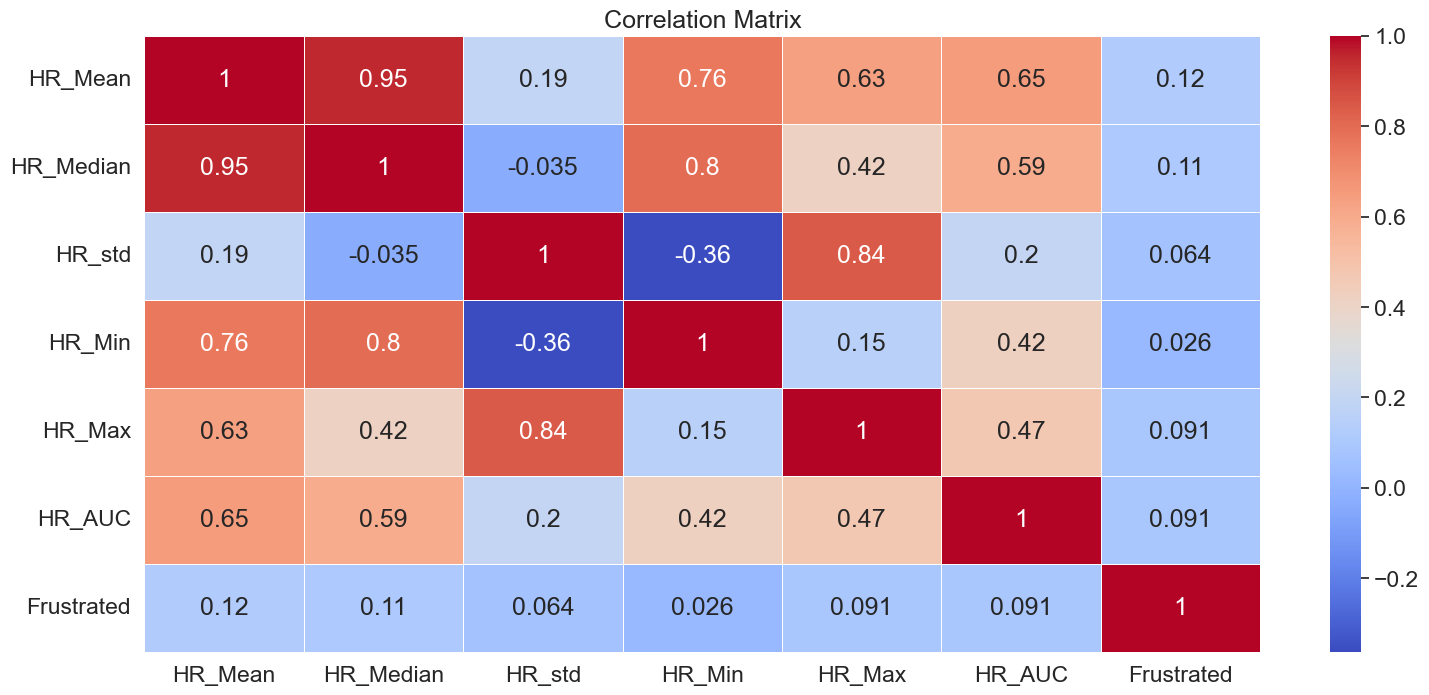

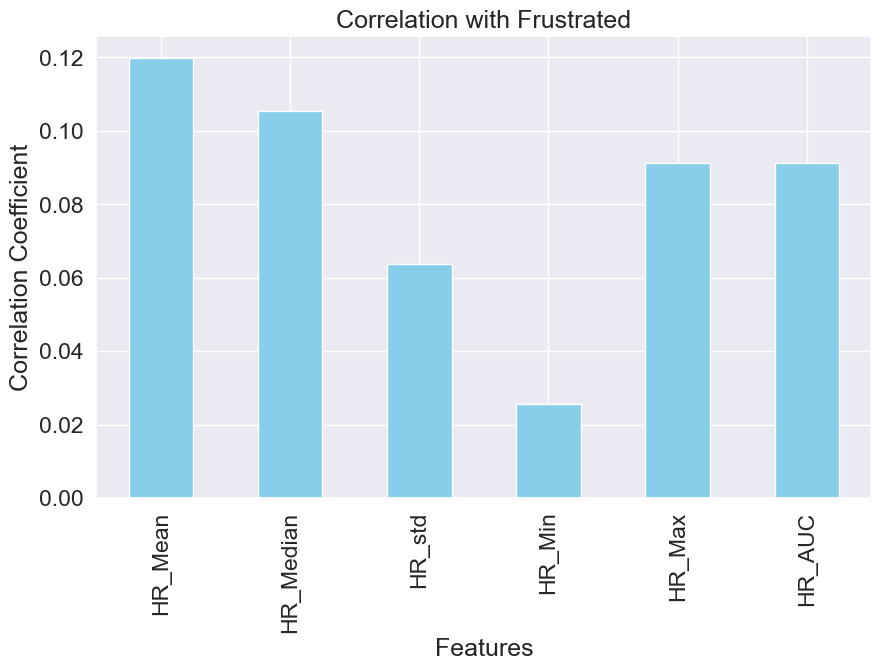

In [587]:
# Correlation matrix
correlation_matrix = df.corr()

# Correlations for "Frustrated"
frustrated_correlation = correlation_matrix["Frustrated"]
print(frustrated_correlation)

# Heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlations "Frustrated" plot
plt.figure(figsize=(10, 6))
frustrated_correlation.drop("Frustrated").plot(kind='bar', color='skyblue')
plt.title('Correlation with Frustrated')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

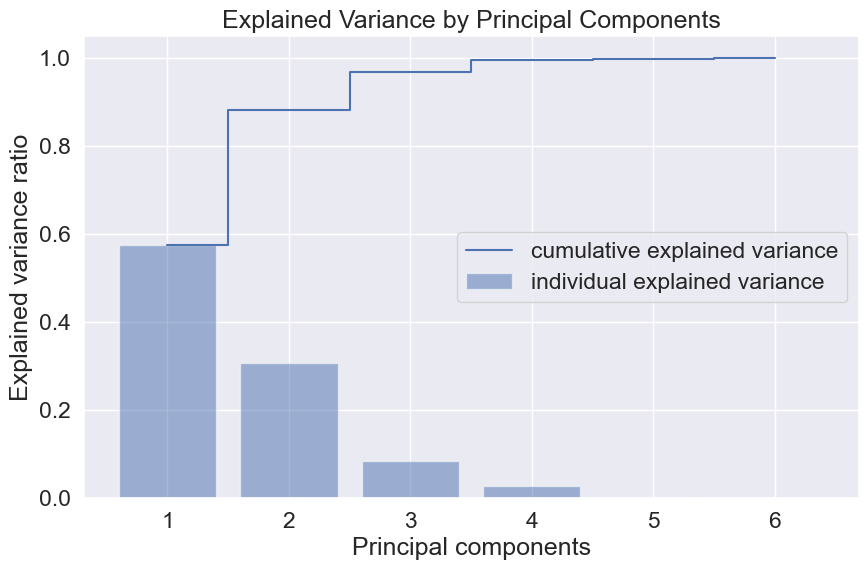

Explained variance ratio by principal components:
PC1: 0.5767, Total variance: 0.5766882372507831
PC2: 0.3067, Total variance: 0.8834367724831084
PC3: 0.0847, Total variance: 0.9681845289365267
PC4: 0.0271, Total variance: 0.9953261456074923
PC5: 0.0035, Total variance: 0.9988581019503059
PC6: 0.0011, Total variance: 1.0000000000000002
Number of components to retain (explaining at least 95% of variance): 3


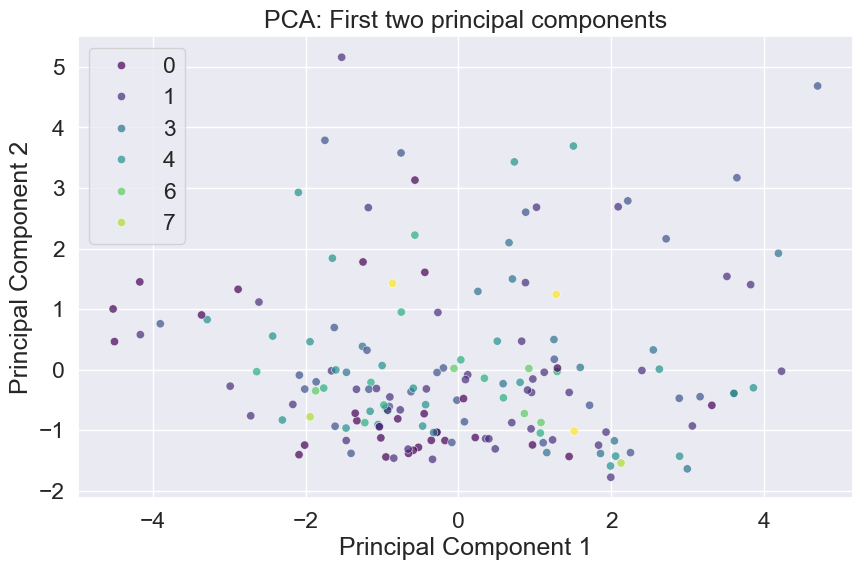

In [588]:
X = df.drop(["Frustrated"],axis=1)

# Standardize continuous data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# DataFrame principal components
pc_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the target variable to the principal components DataFrame
pc_df['Frustrated'] = df['Frustrated']

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Print the explained variance ratio
total_variance = 0
print("Explained variance ratio by principal components:")
for i, ev in enumerate(explained_variance_ratio, start=1):
    total_variance += ev
    print(f'PC{i}: {ev:.4f}, Total variance: {total_variance}')

# Determine the number of components to retain (e.g., to explain at least 95% of the variance)
cumulative_variance = explained_variance_ratio.cumsum()
num_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.95) + 1

print(f"Number of components to retain (explaining at least 95% of variance): {num_components}")

# PC1 and PC2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Frustrated', palette='viridis', alpha=0.7)
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


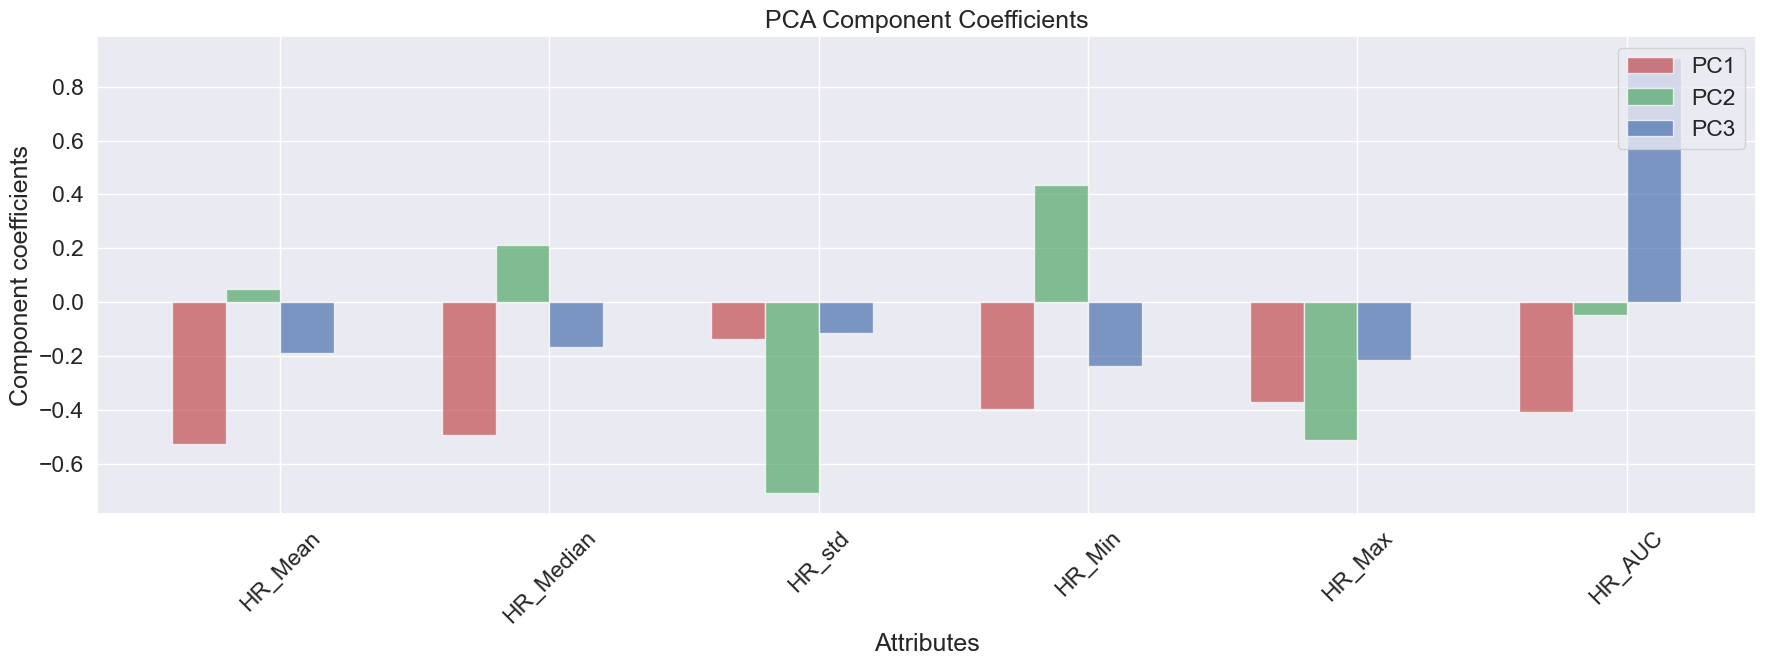

In [589]:
X = df.drop(["Frustrated"],axis=1)
y = df["Frustrated"]

# Standardize the continuous data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


U, S, Vh = svd(X_scaled, full_matrices=False)
V = Vh.T

# Attribute names
attributeNames = X.columns.tolist()

# Plotting PCA Component Coefficients
pcs = range(3)
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(len(attributeNames))

plt.figure(figsize=(18, 7))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw, color=c[i], alpha=0.7)

plt.xticks(r + bw * len(pcs) / 2, attributeNames, rotation=45)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs, loc='upper right')
plt.grid(True)
plt.title("PCA Component Coefficients")
plt.tight_layout()
plt.show()


PCA Component Coefficients (Loadings):
      HR_Mean  HR_Median    HR_std    HR_Min    HR_Max    HR_AUC
PC1  0.527934   0.492433  0.135811  0.396770  0.369093  0.408283
PC2 -0.050025  -0.212355  0.707151 -0.435040  0.510793  0.046592
PC3 -0.190264  -0.164489 -0.112347 -0.236484 -0.215581  0.906488
PC4 -0.221229  -0.617261 -0.004859  0.685137  0.303590  0.091894
PC5 -0.141787   0.067549 -0.656694 -0.288606  0.678697 -0.012774
PC6  0.783286  -0.547526 -0.193907 -0.211384 -0.059912 -0.028374


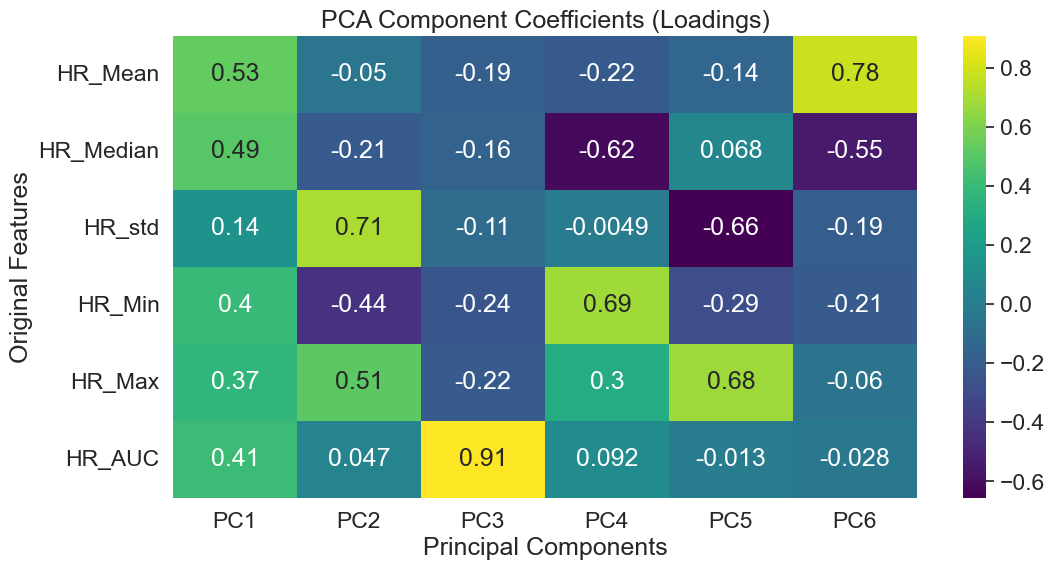

In [590]:
# Retrieve component coefficients
pca_components = pca.components_

# DataFrame for component coefficients
pca_components_df = pd.DataFrame(pca_components, columns=df.columns[:6], index=[f'PC{i+1}' for i in range(len(pca_components))])

# component coefficients
print("PCA Component Coefficients (Loadings):")
print(pca_components_df)

# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components_df.T, annot=True, cmap='viridis')
plt.title('PCA Component Coefficients (Loadings)')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


In [591]:
np.mean(df["Frustrated"])

2.2916666666666665

In [592]:
df["Frustrated_2"] = (df["Frustrated"] >= 3).astype(int)
df

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Frustrated,Frustrated_2
0,77.965186,78.000,3.345290,73.23,83.37,22924.945,1,0
1,70.981097,70.570,2.517879,67.12,78.22,21930.400,5,1
2,73.371959,73.360,3.259569,67.88,80.22,21647.085,0,0
3,78.916822,77.880,4.054595,72.32,84.92,25258.905,1,0
4,77.322226,74.550,6.047603,70.52,90.15,23890.565,5,1
...,...,...,...,...,...,...,...,...
163,73.594539,72.380,9.474556,57.43,93.53,21482.985,8,1
164,57.839897,54.130,6.796647,52.97,74.14,16825.740,0,0
165,64.237295,65.195,3.589241,58.97,72.63,18691.065,1,0
166,70.834320,70.440,2.391160,66.65,76.07,20753.005,4,1


C:\Users\canic\AppData\Local\Temp\ipykernel_16532\1281930712.py:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



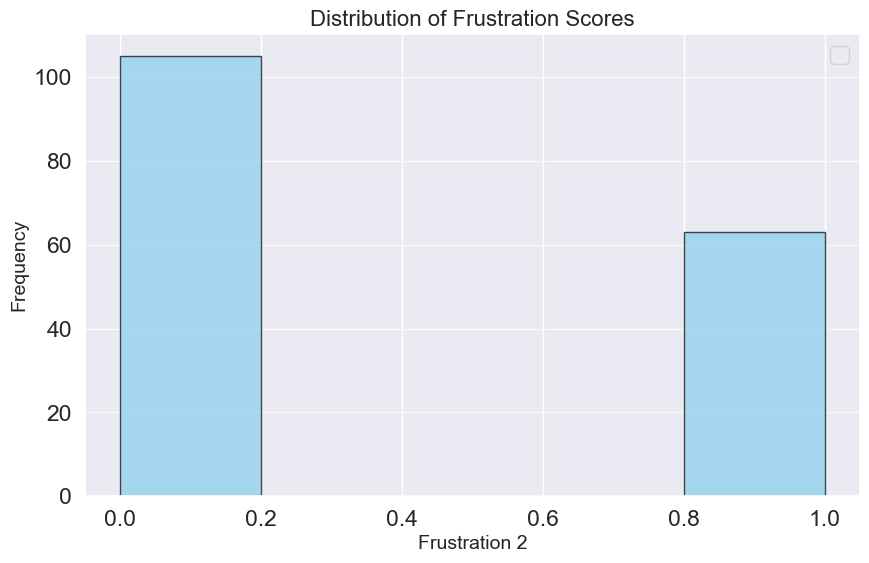

In [593]:
# Plotting the histogram
plt.figure(figsize=(10, 6))

# Spiced-up histogram
plt.hist(df["Frustrated_2"], bins=5, color='skyblue', edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Frustration Scores', fontsize=16)
plt.xlabel('Frustration 2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid
plt.grid(axis='y', alpha=0.75)

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Decision Tree

In [594]:
# Defining input data and output data
# X = df.drop(["Frustrated","Frustrated_2"], axis="columns")
X = pc_df[["PC1","PC2","PC3"]].values
y = df["Frustrated_2"].values

K_folds = 12
# Cross validation, inner and outer:
outer_cv = StratifiedGroupKFold(n_splits=K_folds,shuffle=True,random_state=42)
inner_cv = StratifiedGroupKFold(n_splits=K_folds, shuffle=True, random_state=41)

# Store performance
outer_acc_scores_DS = []
outer_auc_scores_DS = []

for train_idx, test_idx in outer_cv.split(X, y,groups=groups):
    X_train_outer, X_test_outer = X[train_idx], X[test_idx]
    y_train_outer, y_test_outer = y[train_idx], y[test_idx]

    print(np.mean(y_train_outer)*100)

    # Model
    tree = DecisionTreeClassifier(random_state=42)
    
    #Hyperparameter tuning and inner loop:
    param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
    grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=inner_cv.split(X_train_outer, y=y_train_outer, groups=groups[train_idx]), scoring='balanced_accuracy')
    grid_search.fit(X_train_outer, y_train_outer)
    
    # Best model from inner loop
    best_tree = grid_search.best_estimator_
    
    # Evaluate the best model on outer test set:
    y_pred_outer = best_tree.predict(X_test_outer)
    y_prob_outer = best_tree.predict_proba(X_test_outer)[:, 1]
    
    acc_score_outer = balanced_accuracy_score(y_test_outer, y_pred_outer)
    auc_score_outer = roc_auc_score(y_test_outer, y_prob_outer)
    
    outer_acc_scores_DS.append(acc_score_outer)
    outer_auc_scores_DS.append(auc_score_outer)

mean_outer_acc = np.mean(outer_acc_scores_DS)
std_outer_acc = np.std(outer_acc_scores_DS)
mean_outer_auc = np.mean(outer_auc_scores_DS)
std_outer_auc = np.std(outer_auc_scores_DS)

print(f'Mean Accuracy (outer): {mean_outer_acc:.4f} ± {std_outer_acc:.4f}')
print(f'Mean AUC (outer): {mean_outer_auc:.4f} ± {std_outer_auc:.4f}')
print(f'Best accuracy: {np.max(outer_acc_scores_DS):.4f}')



40.97222222222222
35.41666666666667
35.256410256410255
38.46153846153847
37.17948717948718
37.82051282051282
36.53846153846153
34.61538461538461
37.82051282051282
38.46153846153847
37.82051282051282
39.743589743589745
Mean Accuracy (outer): 0.5603 ± 0.0997
Mean AUC (outer): 0.5886 ± 0.1884
Best accuracy: 0.7500


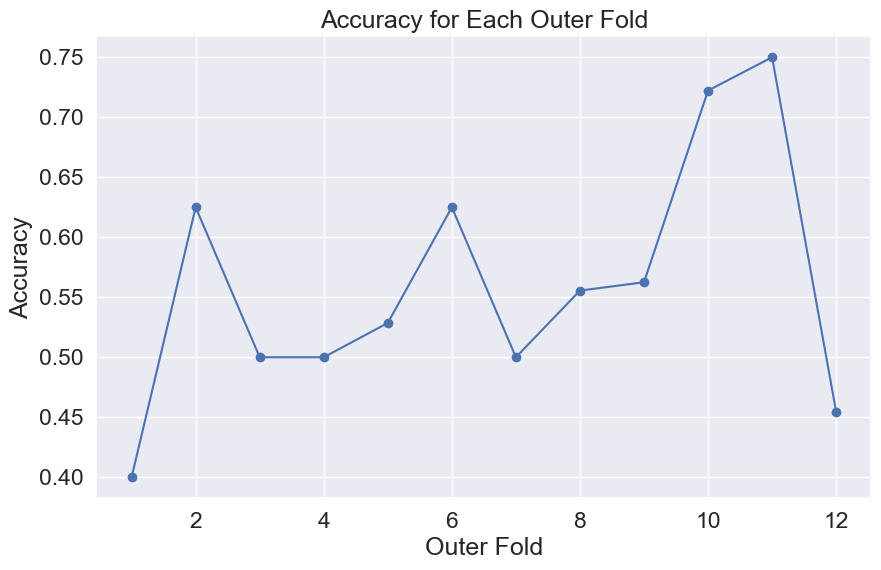

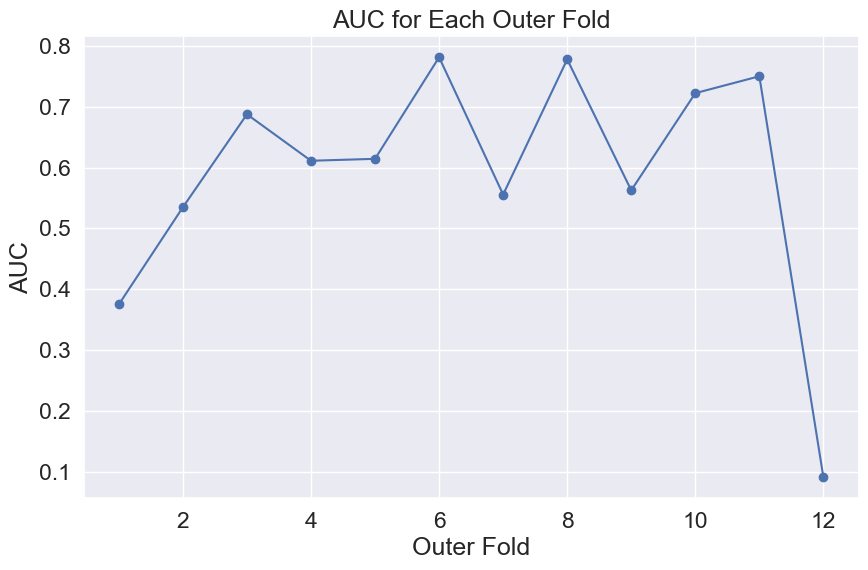

In [595]:
# Plotting Accuracy for each outer fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(outer_acc_scores_DS) + 1), outer_acc_scores_DS, marker='o', linestyle='-', color='b')
plt.xlabel('Outer Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Outer Fold')
plt.grid(True)
plt.show()

# Plotting AUC for each outer fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(outer_auc_scores_DS) + 1), outer_auc_scores_DS, marker='o', linestyle='-', color='b')
plt.xlabel('Outer Fold')
plt.ylabel('AUC')
plt.title('AUC for Each Outer Fold')
plt.grid(True)
plt.show()


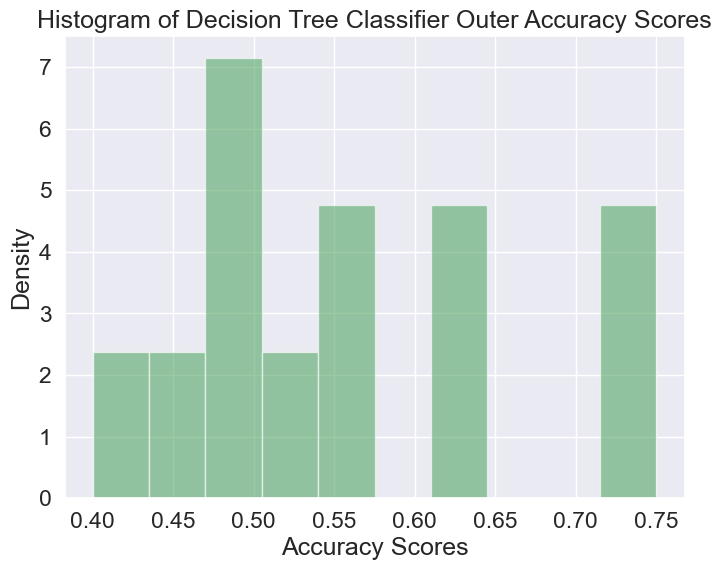

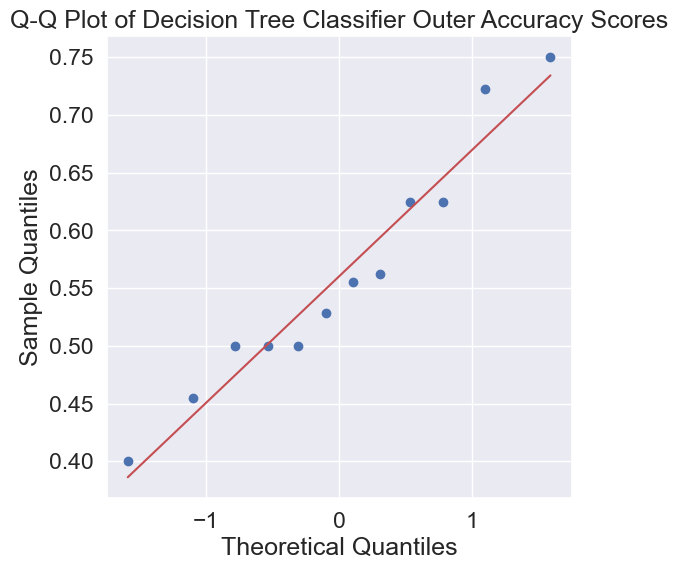

Statistic: 0.9477580874672417, p-value: 0.6044751474086987
The data appears to be normally distributed (fail to reject H0)


In [596]:
# Visual inspection: Histogram
plt.figure(figsize=(8, 6))
plt.hist(outer_acc_scores_DS, bins=10, density=True, alpha=0.6, color='g')
plt.title('Histogram of Decision Tree Classifier Outer Accuracy Scores')
plt.xlabel('Accuracy Scores')
plt.ylabel('Density')
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(outer_acc_scores_DS, dist="norm", plot=plt)
plt.title('Q-Q Plot of Decision Tree Classifier Outer Accuracy Scores')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Statistical test:
statistic, p_value = stats.shapiro(outer_acc_scores_DS)
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")


# Random forest classifier

In [597]:
X = pc_df[["PC1","PC2","PC3"]].values
y = df["Frustrated_2"]

K_folds = 12
# Cross validation, inner and outer:
outer_cv = StratifiedGroupKFold(n_splits=K_folds, shuffle=True, random_state=42)
inner_cv = StratifiedGroupKFold(n_splits=K_folds, shuffle=True, random_state=41)

# Store performance
outer_acc_scores_RFC = []
outer_auc_scores_RFC = []

for train_idx, test_idx in outer_cv.split(X_scaled, y,groups=groups):
    X_train_outer, X_test_outer = X_scaled[train_idx], X_scaled[test_idx]
    y_train_outer, y_test_outer = y[train_idx], y[test_idx]
    
    # Model
    RFC = RandomForestClassifier(n_estimators=500,random_state=3)
    
    # Hyperparameter tuning
    param_grid = {
        'max_depth': [None, 20,30,40],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 3,],
        'max_features': ['sqrt', None]}
    grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=inner_cv.split(X_train_outer, y=y_train_outer, groups=groups[train_idx]), scoring='balanced_accuracy')
    grid_search.fit(X_train_outer, y_train_outer)
    
    # Select the best model from inner loop
    best_rfc = grid_search.best_estimator_
    
    # Evaluate the best model on outer test set
    y_pred_outer = best_rfc.predict(X_test_outer)
    y_prob_outer = best_rfc.predict_proba(X_test_outer)[:, 1]
    
    acc_score_outer = balanced_accuracy_score(y_test_outer, y_pred_outer)
    auc_score_outer = roc_auc_score(y_test_outer, y_prob_outer)
    
    outer_acc_scores_RFC.append(acc_score_outer)
    outer_auc_scores_RFC.append(auc_score_outer)

mean_outer_acc = np.mean(outer_acc_scores_RFC)
std_outer_acc = np.std(outer_acc_scores_RFC)
mean_outer_auc = np.mean(outer_auc_scores_RFC)
std_outer_auc = np.std(outer_auc_scores_RFC)

print(f'Mean Accuracy (outer): {mean_outer_acc:.4f} ± {std_outer_acc:.4f}')
print(f'Mean AUC (outer): {mean_outer_auc:.4f} ± {std_outer_auc:.4f}')
print(f'Best accuracy: {np.max(outer_acc_scores_RFC):.4f}')





Mean Accuracy (outer): 0.4562 ± 0.1611
Mean AUC (outer): 0.5061 ± 0.1974
Best accuracy: 0.7778


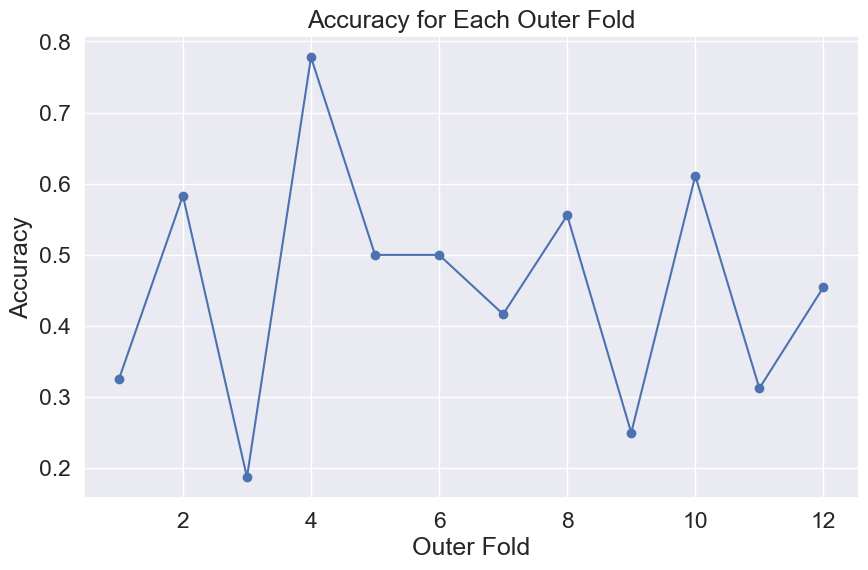

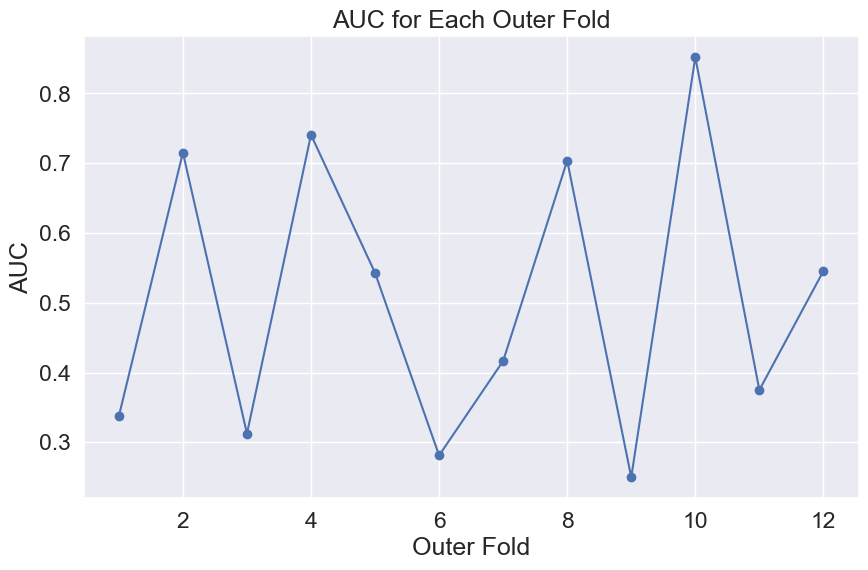

In [598]:
# Plotting Accuracy for each outer fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(outer_acc_scores_RFC) + 1), outer_acc_scores_RFC, marker='o', linestyle='-', color='b')
plt.xlabel('Outer Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Outer Fold')
plt.grid(True)
plt.show()

# Plotting AUC for each outer fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(outer_auc_scores_RFC) + 1), outer_auc_scores_RFC, marker='o', linestyle='-', color='b')
plt.xlabel('Outer Fold')
plt.ylabel('AUC')
plt.title('AUC for Each Outer Fold')
plt.grid(True)
plt.show()

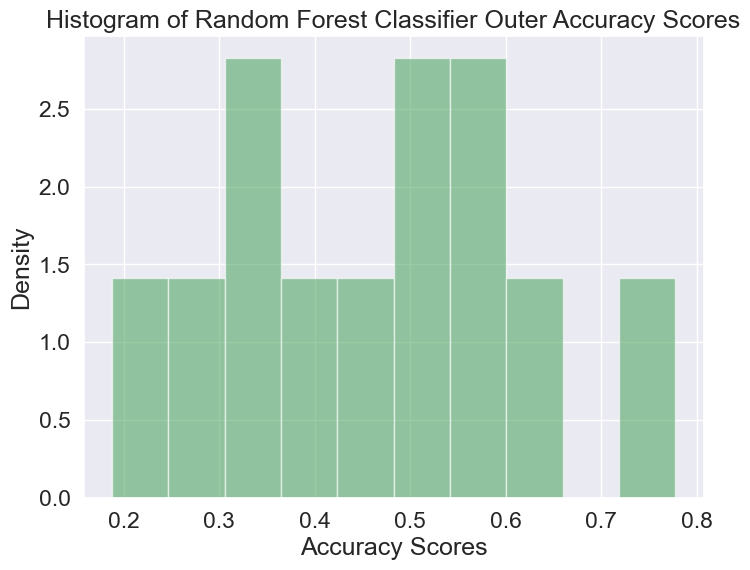

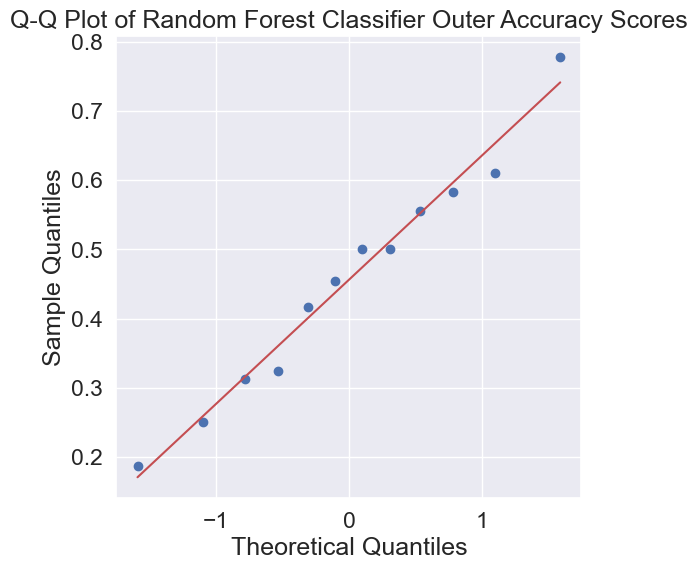

Statistic: 0.9800560260709577, p-value: 0.9838717739287746
The data appears to be normally distributed (fail to reject H0)


In [599]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(outer_acc_scores_RFC, bins=10, density=True, alpha=0.6, color='g')
plt.title('Histogram of Random Forest Classifier Outer Accuracy Scores')
plt.xlabel('Accuracy Scores')
plt.ylabel('Density')
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(outer_acc_scores_RFC, dist="norm", plot=plt)
plt.title('Q-Q Plot of Random Forest Classifier Outer Accuracy Scores')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Statistical test:
statistic, p_value = stats.shapiro(outer_acc_scores_RFC)
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")


In [600]:
print(f'Decision tree:\n \n {outer_acc_scores_DS} \n \n')
print(f'Random Forest Classifier: \n \n {outer_acc_scores_RFC}')

Decision tree:
 
 [0.4, 0.625, 0.5, 0.5, 0.5285714285714286, 0.625, 0.5, 0.5555555555555556, 0.5625, 0.7222222222222222, 0.75, 0.45454545454545453] 
 

Random Forest Classifier: 
 
 [0.325, 0.5833333333333334, 0.1875, 0.7777777777777777, 0.5, 0.5, 0.41666666666666663, 0.5555555555555556, 0.25, 0.611111111111111, 0.3125, 0.45454545454545453]


In [601]:
t_statistic, p_value = stats.ttest_ind(outer_acc_scores_DS,outer_acc_scores_RFC,equal_var=False)

print(f"T-Statistic: {t_statistic:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the models.")
else:
    print("There is no significant difference between the models.")

T-Statistic: 1.8225, P-Value: 0.0847
There is no significant difference between the models.


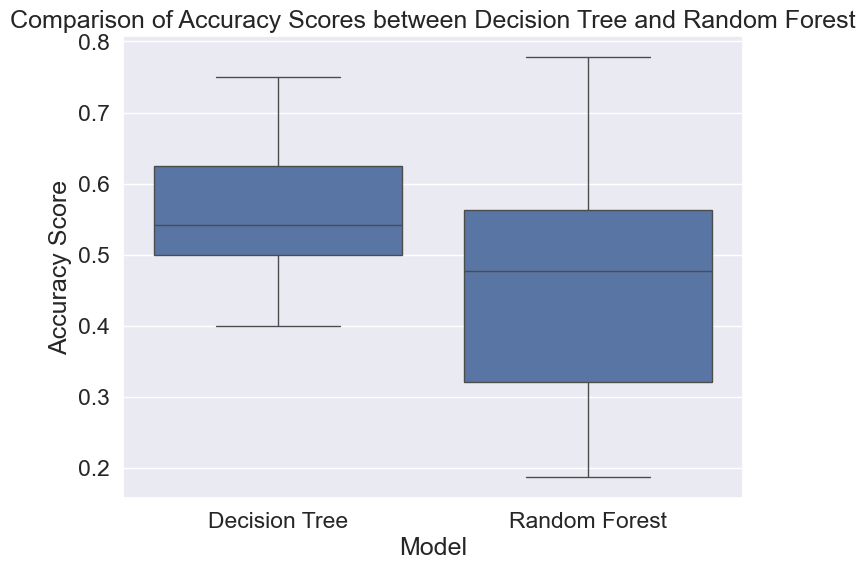

In [602]:
# Combine scores into a single list:
data = {'Model': ['Decision Tree'] * len(outer_acc_scores_DS) + ['Random Forest'] * len(outer_acc_scores_RFC),
        'Accuracy': outer_acc_scores_DS + outer_acc_scores_RFC}

#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='Accuracy', data=data)
plt.title('Comparison of Accuracy Scores between Decision Tree and Random Forest')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.show()

In [603]:
dt_mean = np.mean(outer_acc_scores_DS)
rfc_mean = np.mean(outer_acc_scores_RFC)
dt_std = np.std(outer_acc_scores_DS)
rfc_std = np.std(outer_acc_scores_RFC)

print(f"Decision Tree: Mean Accuracy = {dt_mean:.4f}, Std Deviation = {dt_std:.4f}")
print(f"Random Forest: Mean Accuracy = {rfc_mean:.4f}, Std Deviation = {rfc_std:.4f}")

Decision Tree: Mean Accuracy = 0.5603, Std Deviation = 0.0997
Random Forest: Mean Accuracy = 0.4562, Std Deviation = 0.1611
